<a href="https://colab.research.google.com/github/Grelatif/Data_Science/blob/main/Data_Scapping_Countries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal of this project is to be able to scrap data from a REST API (geo data), and then to use it to make some fun plots.

There are 3 levels of expertise, the last one is n interctive map with the countries I have been to.


In [ ]:
import requests
import pandas as pd

In [ ]:
# First example with france
country = "france" # selecta country
url = f"https://restcountries.com/v3.1/name/{country}"

response = requests.get(url)
response.json()

[{'name': {'common': 'France',
   'official': 'French Republic',
   'nativeName': {'fra': {'official': 'République française',
     'common': 'France'}}},
  'tld': ['.fr'],
  'cca2': 'FR',
  'ccn3': '250',
  'cca3': 'FRA',
  'cioc': 'FRA',
  'independent': True,
  'status': 'officially-assigned',
  'unMember': True,
  'currencies': {'EUR': {'name': 'Euro', 'symbol': '€'}},
  'idd': {'root': '+3', 'suffixes': ['3']},
  'capital': ['Paris'],
  'altSpellings': ['FR', 'French Republic', 'République française'],
  'region': 'Europe',
  'subregion': 'Western Europe',
  'languages': {'fra': 'French'},
  'translations': {'ara': {'official': 'الجمهورية الفرنسية',
    'common': 'فرنسا'},
   'bre': {'official': 'Republik Frañs', 'common': 'Frañs'},
   'ces': {'official': 'Francouzská republika', 'common': 'Francie'},
   'cym': {'official': 'French Republic', 'common': 'France'},
   'deu': {'official': 'Französische Republik', 'common': 'Frankreich'},
   'est': {'official': 'Prantsuse Vabariik', '

In [ ]:

try:
    # Envoi de la requête GET
    response = requests.get(url)

    # Vérifier si la requête a réussi (status code 200)
    response.raise_for_status()  # Lève une exception si le code de statut n'est pas 200 (OK)

    # Conversion des données JSON en Python
    country_data = response.json()

    # Affichage des informations
    country = country_data[0]  # Le résultat est une liste, on prend le premier élément
    print(f"Nom : {country['name']['common']}")
    print(f"Capital : {country['capital'][0]}")
    print(f"Population : {country['population']}")
    print(f"Région : {country['region']}")
    print(f"Langues : {', '.join(country['languages'].values())}")
    #Ici, country['currencies'].keys() renverrait ["USD", "EUR"].
    #.join() est une méthode qui permet de joindre les éléments d'une liste avec un séparateur , ici ", "
    #Par exemple, si country['languages'].values() renvoie ["French", "English", "German"], la ligne ', '.join(...) va créer une chaîne de caractères : "French, English, German".
    print(f"Monnaie : {', '.join(country['currencies'].keys())}")
    print(f"Flag : {country['flags']['png']}")
    print(f"latitude : {country['latlng'][0]} , longitude: {country['latlng'][1]}")

except requests.exceptions.RequestException as e:
    # Capturer toutes les exceptions liées à la requête (erreurs de connexion, timeout, etc.)
    print(f"Erreur lors de la requête : {e}")

except ValueError:
    # Capturer des erreurs lors du parsing JSON
    print("Erreur lors du parsing des données JSON.")

except KeyError as e:
    # Capturer des erreurs si une clé attendue est manquante dans les données JSON
    print(f"Clé manquante dans les données : {e}")

except Exception as e:
    # Capturer toutes les autres erreurs
    print(f"Une erreur inattendue est survenue : {e}")


Nom : France
Capital : Paris
Population : 67391582
Région : Europe
Langues : French
Monnaie : EUR
Flag : https://flagcdn.com/w320/fr.png
latitude : 46.0 , longitude: 2.0


In [ ]:
# Now let's take all the countries
url = "https://restcountries.com/v3.1/all"
response = requests.get(url)
response.json()


len(response.json()) # 250 countries, as a list of dictionnaries
response.json()[0:10] # one country to see the structure



250

In [ ]:
for country in response.json():

  if "capital" in country and len(country["capital"]) > 1:
    print(country["name"]["common"])
    print((country["capital"]))

South Africa
['Pretoria', 'Bloemfontein', 'Cape Town']
Palestine
['Ramallah', 'Jerusalem']


In [ ]:
"""for i,country in enumerate(response.json()):
  print(i,country["name"]["common"], end = ' ') #by default print ends with '\n'
  print(f"latitude : {country['capitalInfo']['latlng'][0]}, longitude: {country['capitalInfo']['latlng'][1]}")
# we can see that some country don't have coordinates, we need to manage that
"""
def get_country_coord():
  #dico = {'paris' : ['latlng[0]', 'latlng[1]', country["population"]],
  #        'madrid'  : ['latlng[0]', 'latlng[1]', country["population"]]}
  dico = {}
  for i,country in enumerate(response.json()):
    if 'capitalInfo' in country and 'latlng' in country['capitalInfo']:
      print(country["capital"], country["capitalInfo"]['latlng'])
      dico.update({country["capital"][0]: [country["capitalInfo"]['latlng'][0],country["capitalInfo"]['latlng'][1], country["population"]]})
  return dico
  # Get all countries
  # Create an empty dict
  # Loop on all countries
  # Check if country hs capital and coordinates
  #Append at each loop Country as key : capital and coordintes as value
  #print on  graph (classic one all the pairs of coordinates)
res = get_country_coord()
res


['King Edward Point'] [-54.28, -36.5]
["St. George's"] [32.38, -64.68]
['Bern'] [46.92, 7.47]
['Freetown'] [8.48, -13.23]
['Budapest'] [47.5, 19.08]
['Taipei'] [25.03, 121.52]
['Mata-Utu'] [-13.95, -171.93]
['Bridgetown'] [13.1, -59.62]
['Adamstown'] [-25.07, -130.08]
['Yamoussoukro'] [6.82, -5.27]
['Tunis'] [36.8, 10.18]
['Rome'] [41.9, 12.48]
['Porto-Novo'] [6.48, 2.62]
['Jakarta'] [-6.17, 106.82]
['Praia'] [14.92, -23.52]
['Basseterre'] [17.3, -62.72]
['Vientiane'] [17.97, 102.6]
['Kralendijk'] [12.14, -68.27]
['Kampala'] [0.32, 32.55]
['Andorra la Vella'] [42.5, 1.52]
['Gitega'] [-3.43, 29.93]
['Pretoria', 'Bloemfontein', 'Cape Town'] [-25.7, 28.22]
['Paris'] [48.87, 2.33]
['Tripoli'] [32.88, 13.17]
['Mexico City'] [19.43, -99.13]
['Libreville'] [0.38, 9.45]
['Saipan'] [15.2, 145.75]
['Skopje'] [42.0, 21.43]
['Beijing'] [39.92, 116.38]
["Sana'a"] [15.37, 44.19]
['Gustavia'] [17.88, -62.85]
['St. Peter Port'] [49.45, -2.54]
['Honiara'] [-9.43, 159.95]
['Longyearbyen'] [78.22, 15.63]

{'King Edward Point': [-54.28, -36.5, 30],
 "St. George's": [32.38, -64.68, 112519],
 'Bern': [46.92, 7.47, 8654622],
 'Freetown': [8.48, -13.23, 7976985],
 'Budapest': [47.5, 19.08, 9749763],
 'Taipei': [25.03, 121.52, 23503349],
 'Mata-Utu': [-13.95, -171.93, 11750],
 'Bridgetown': [13.1, -59.62, 287371],
 'Adamstown': [-25.07, -130.08, 56],
 'Yamoussoukro': [6.82, -5.27, 26378275],
 'Tunis': [36.8, 10.18, 11818618],
 'Rome': [41.9, 12.48, 59554023],
 'Porto-Novo': [6.48, 2.62, 12123198],
 'Jakarta': [-6.17, 106.82, 273523621],
 'Praia': [14.92, -23.52, 555988],
 'Basseterre': [17.3, -62.72, 53192],
 'Vientiane': [17.97, 102.6, 7275556],
 'Kralendijk': [12.14, -68.27, 25987],
 'Kampala': [0.32, 32.55, 45741000],
 'Andorra la Vella': [42.5, 1.52, 77265],
 'Gitega': [-3.43, 29.93, 11890781],
 'Pretoria': [-25.7, 28.22, 59308690],
 'Paris': [48.87, 2.33, 67391582],
 'Tripoli': [32.88, 13.17, 6871287],
 'Mexico City': [19.43, -99.13, 128932753],
 'Libreville': [0.38, 9.45, 2225728],
 'Sa

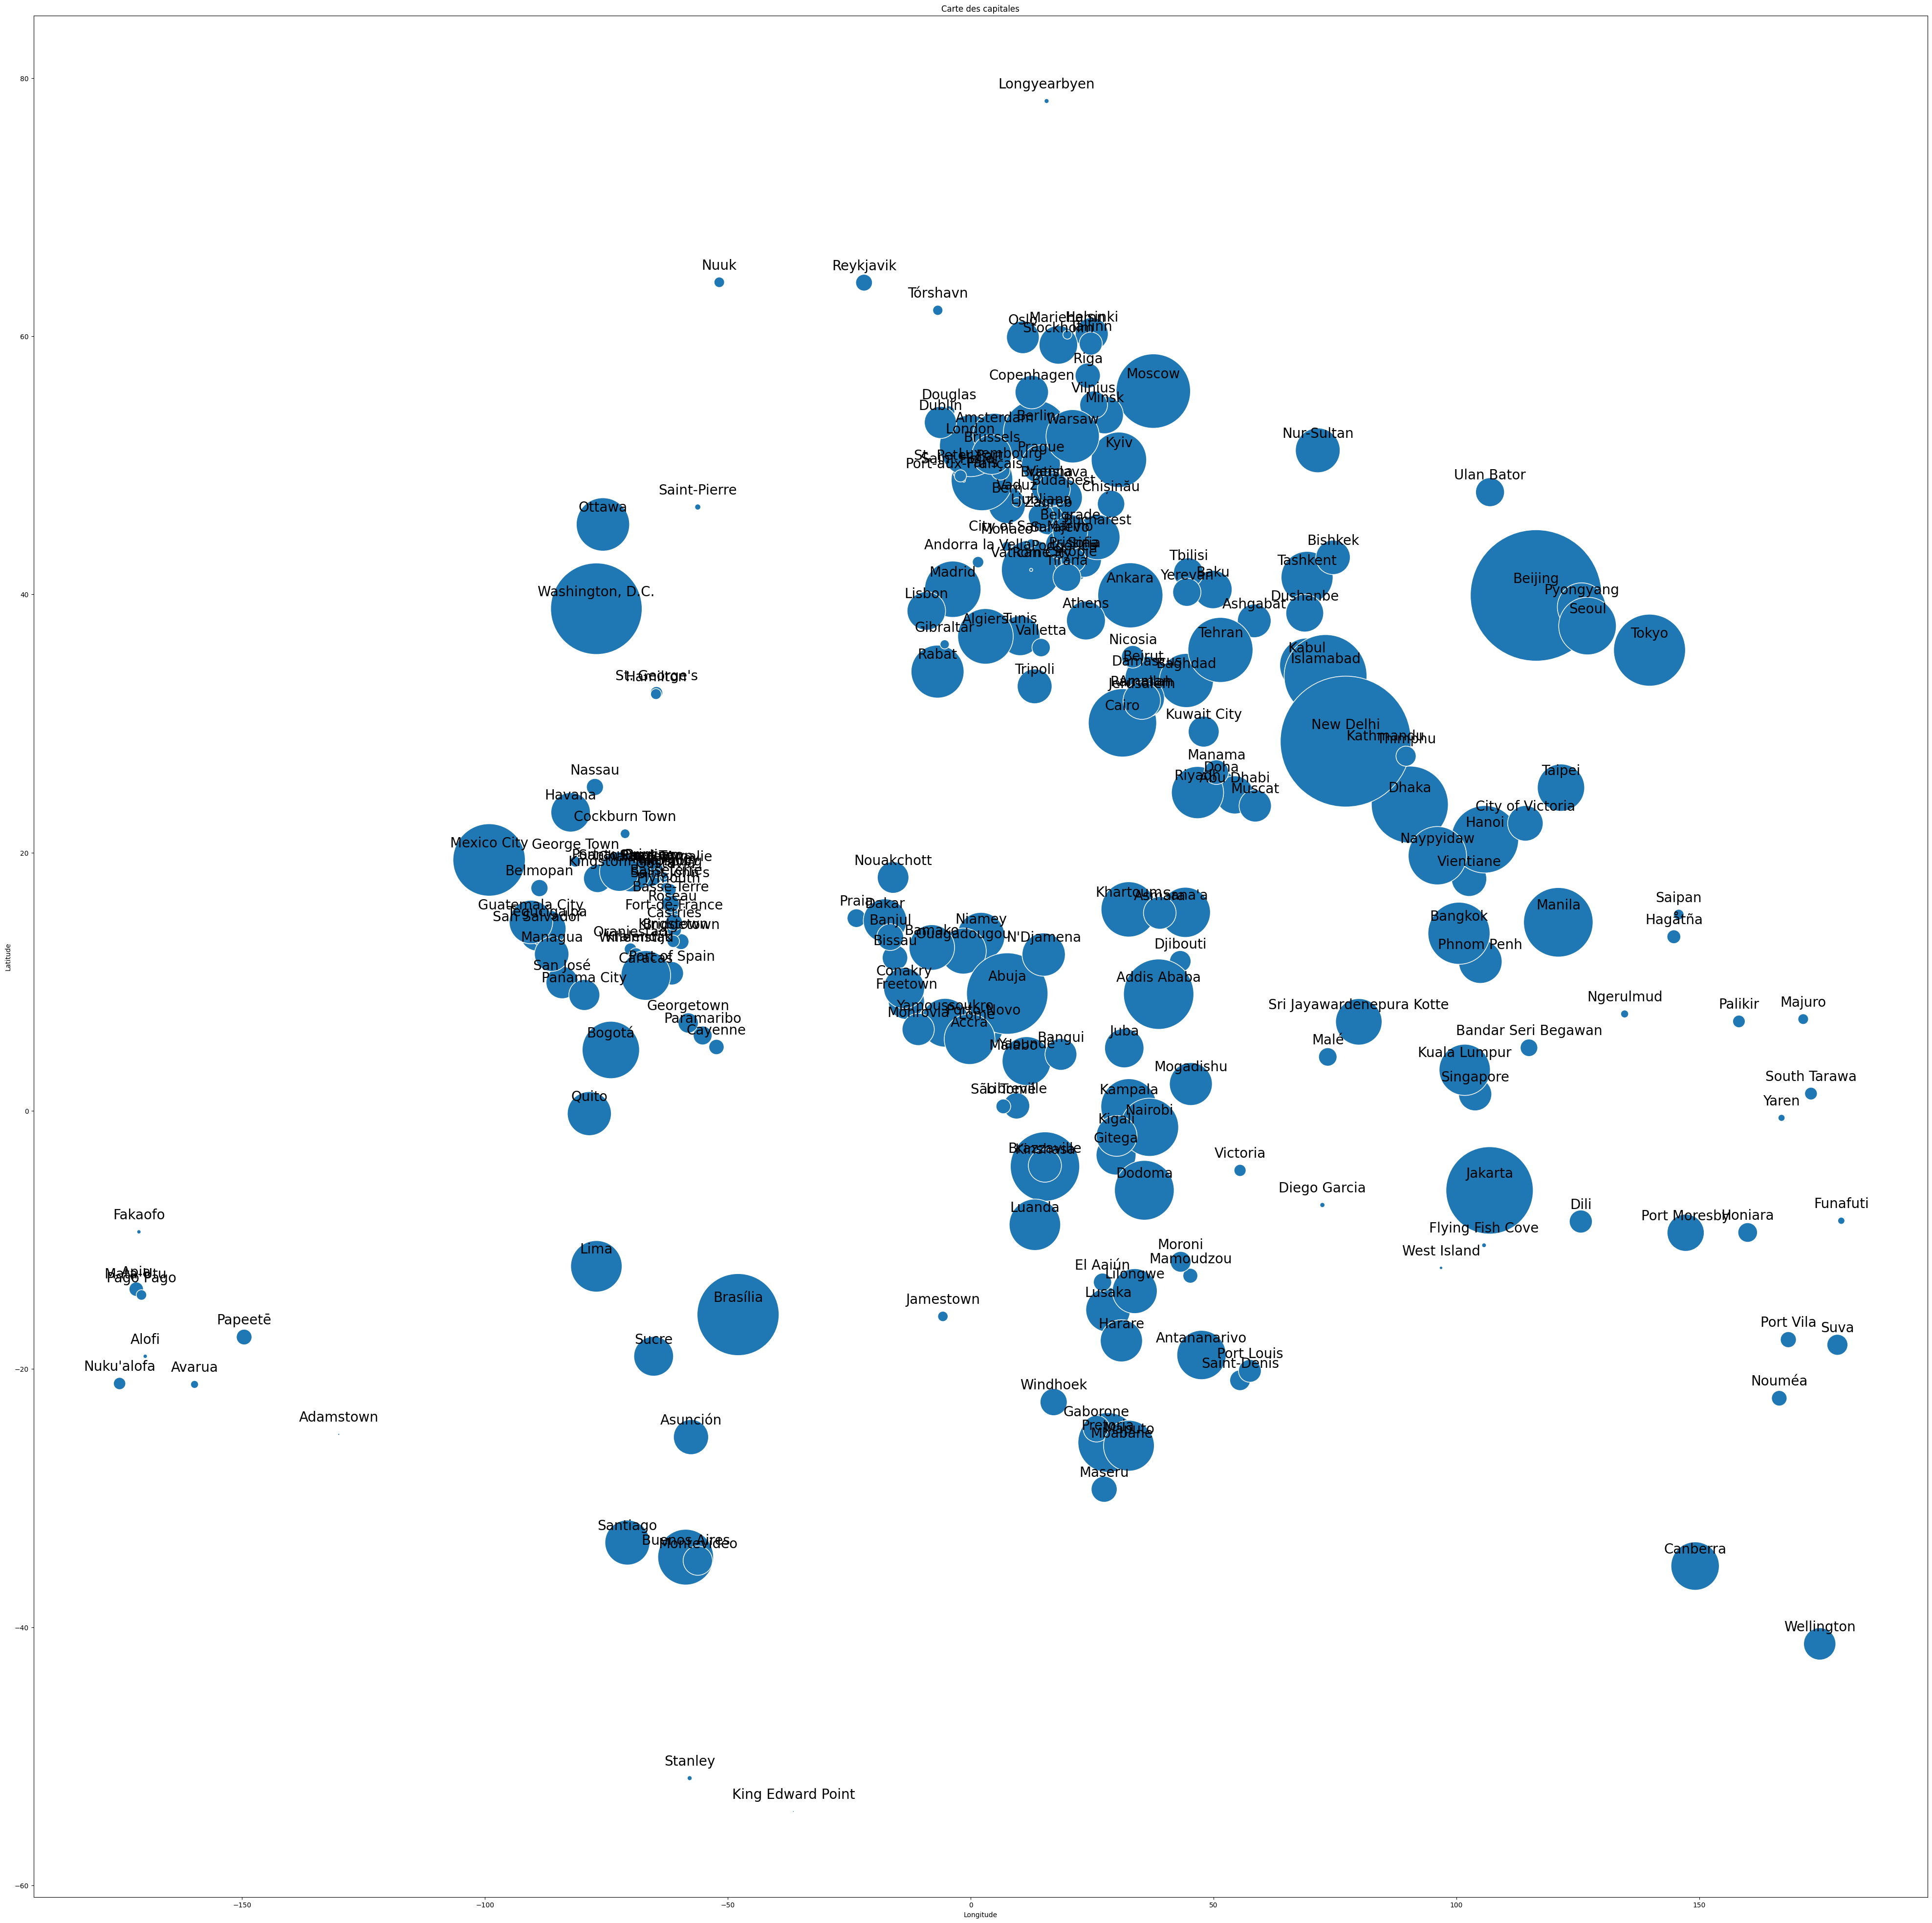

In [ ]:
## Novice level

import numpy as np
#now we have res our dictionnary with capitals and coords.

# we will make the plot.
# get lats and longs
# get the labels (capitals)
# Plot
# Tune

# get coords and labels
latitudes = [res[country][0] for country in res.keys()]
longitudes = [res[country][1] for country in res.keys()]
pops = [res[country][2] for country in res.keys()]
labels = list(res.keys())

sizes = np.sqrt(pops)  # Échelle logarithmique pour éviter des cercles trop grands

import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (50,50))
sns.scatterplot(y = latitudes, x = longitudes, s = sizes) #now we would like to have the size related to the population of the country

# Ajouter les noms des villes
for i, country in enumerate(labels):
    plt.text(longitudes[i], latitudes[i] + 1, country, fontsize=20, ha='center') #afficher du texte de coordonnées (x,y)

# Ajouter les titres et labels
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Carte des capitales")

# Afficher la carte
plt.show()





In [ ]:
!pip install cartopy
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 93.2 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


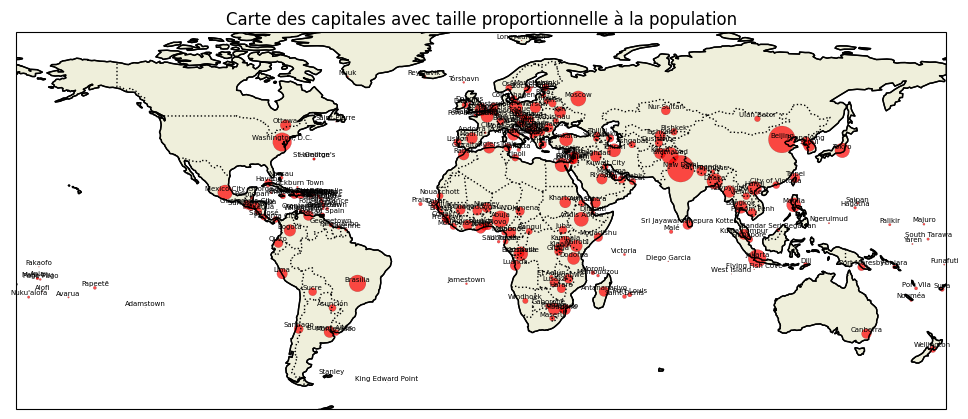

In [ ]:
# Intermediate level

# now we use the idea of gpt to use cartopy to add the map


latitudes = [res[country][0] for country in res]
longitudes = [res[country][1] for country in res]
pops = [res[country][2] for country in res]
labels = list(res.keys())

# Appliquer une échelle aux tailles des points
sizes = np.sqrt(pops)/100

# Créer la figure avec projection géographique
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-130, 160, -60, 80])  # Ajuster les limites de la carte

# Ajouter un fond de carte
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Ajouter les points
sns.scatterplot(x=longitudes, y=latitudes, s=sizes, color="red", edgecolor="black", alpha=0.7, ax=ax)

# Ajouter les noms des capitales
for i, country in enumerate(labels):
    ax.text(longitudes[i], latitudes[i] + 1, country,
            fontsize=5, ha='center')

# Titre
plt.title("Carte des capitales avec taille proportionnelle à la population")
plt.show()


In [ ]:
# Idée : Creer un trivia game avec les capitales de chaque pays.
# Pondérer les probabilités d'occurrence d'un pays en fonction de son nombre d'habitants

In [ ]:
!pip install adjustText
from adjustText import adjust_text
import matplotlib.cm as cm

/usr/local/lib/python3.11/dist-packages/cartopy/mpl/geoaxes.py:527: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  super()._update_title_position(renderer)
/usr/local/lib/python3.11/dist-packages/cartopy/mpl/geoaxes.py:527: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  super()._update_title_position(renderer)
/usr/local/lib/python3.11/dist-packages/cartopy/mpl/geoaxes.py:524: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  return super().draw(renderer=renderer, **kwargs)


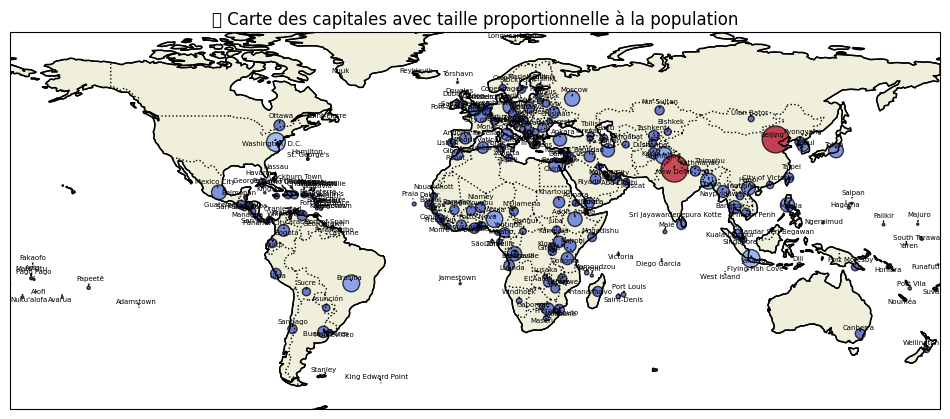

In [ ]:
# Now add color shades with colormap

latitudes = [res[country][0] for country in res]
longitudes = [res[country][1] for country in res]
pops = [res[country][2] for country in res]
labels = list(res.keys())

sizes = np.sqrt(pops)/100  # Échelle logarithmique pour éviter des écarts trop grands

# Appliquer un dégradé de couleur selon la population
norm = plt.Normalize(min(pops), max(pops)) #colormap fonctionne avec des valeurs entre 0 et 1 on doit donc transformer nos données dans cet intervalle
colors = cm.coolwarm(norm(pops))

# Créer la figure avec projection géographique
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-130, 160, -60, 80])  # Définir les limites de la carte

ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Tracer les points des capitales avec couleurs et tailles
scatter = ax.scatter(longitudes, latitudes, s=sizes, color=colors, edgecolor="black", alpha=0.75, transform=ccrs.PlateCarree())

#Ajouter les labels des villes avec `adjustText` pour éviter le chevauchement
texts = []
for i, country in enumerate(labels):
    texts.append(ax.text(longitudes[i], latitudes[i] + 1, country, fontsize=5, ha='center'))
adjust_text(texts, only_move={'points': 'y', 'texts': 'y'}, arrowprops=dict(arrowstyle='-', color='black'))

# Ajouter un titre
plt.title("Carte des capitales avec taille proportionnelle à la population")

# Afficher le graphique
plt.show()



In [ ]:
response.json()

[{'name': {'common': 'South Georgia',
   'official': 'South Georgia and the South Sandwich Islands',
   'nativeName': {'eng': {'official': 'South Georgia and the South Sandwich Islands',
     'common': 'South Georgia'}}},
  'tld': ['.gs'],
  'cca2': 'GS',
  'ccn3': '239',
  'cca3': 'SGS',
  'independent': False,
  'status': 'officially-assigned',
  'unMember': False,
  'currencies': {'SHP': {'name': 'Saint Helena pound', 'symbol': '£'}},
  'idd': {'root': '+5', 'suffixes': ['00']},
  'capital': ['King Edward Point'],
  'altSpellings': ['GS', 'South Georgia and the South Sandwich Islands'],
  'region': 'Antarctic',
  'languages': {'eng': 'English'},
  'translations': {'ara': {'official': 'جورجيا الجنوبية وجزر ساندوتش الجنوبية',
    'common': 'جورجيا الجنوبية'},
   'bre': {'official': 'Georgia ar Su hag Inizi Sandwich ar Su',
    'common': 'Georgia ar Su hag Inizi Sandwich ar Su'},
   'ces': {'official': 'Jižní Georgie a Jižní Sandwichovy ostrovy',
    'common': 'Jižní Georgie a Jižní Sa

In [ ]:
# Expert level

import requests
import folium

def get_country_color(population):
  if population > 200000000:
    return "red"
  elif population > 50000000:
    return "orange"
  elif population > 10000000:
    return "green"
  else :
    return "blue"


# Fonction pour créer une carte et y ajouter des marqueurs
def create_map(dico):
    # Création d'une carte centrée autour de l'équateur
    world_map = folium.Map(location=[20, 0], zoom_start=2)

    # Ajouter un marqueur pour chaque pays avec ses coordonnées
    for country in response.json():
      color = get_country_color(country["population"])
      if 'capitalInfo' in country and 'latlng' in country['capitalInfo'] and  color != "blue": # we can add a condition on population to void all the little countries

        print([country['capitalInfo']['latlng'][0], country['capitalInfo']['latlng'][1]])
        folium.Marker(
            location=[country['capitalInfo']['latlng'][0], country['capitalInfo']['latlng'][1]],
            popup=', '.join([(country['name']["common"]), " with a population of: ", str(country["population"]), "capitals :", ', '.join(country['capital']) ]),
            icon=folium.Icon(color=color)
        ).add_to(world_map)

    return world_map



# Créer la carte
world_map = create_map(response.json())

# Afficher la carte
world_map


[25.03, 121.52]
[6.82, -5.27]
[36.8, 10.18]
[41.9, 12.48]
[6.48, 2.62]
[-6.17, 106.82]
[0.32, 32.55]
[-3.43, 29.93]
[-25.7, 28.22]
[48.87, 2.33]
[19.43, -99.13]
[39.92, 116.38]
[15.37, 44.19]
[41.32, 69.25]
[30.05, 31.25]
[14.73, -17.63]
[6.89, 79.9]
[23.72, 90.4]
[-12.05, -77.05]
[39.93, 32.87]
[34.52, 69.18]
[51.5, -0.08]
[-15.42, 28.28]
[13.52, 2.12]
[40.38, 49.87]
[39.02, 125.75]
[4.71, -74.07]
[37.98, 23.73]
[34.02, -6.82]
[36.75, 3.05]
[52.35, 4.92]
[15.6, 32.53]
[27.72, 85.32]
[33.68, 73.05]
[18.47, -69.9]
[-18.92, 47.52]
[28.6, 77.2]
[33.5, 36.3]
[50.43, 30.52]
[52.52, 13.4]
[11.55, 104.92]
[33.33, 44.4]
[59.33, 18.05]
[23.12, -82.35]
[55.75, 37.6]
[3.17, 101.7]
[45.42, -75.7]
[-13.97, 33.78]
[24.65, 46.7]
[9.03, 38.7]
[40.4, -3.68]
[-34.58, -58.67]
[-35.27, 149.13]
[13.75, 100.52]
[18.53, -72.33]
[14.6, 120.97]
[3.85, 11.5]
[9.5, -13.7]
[-4.32, 15.3]
[2.07, 45.33]
[50.08, 14.47]
[-1.28, 36.82]
[-1.95, 30.05]
[44.43, 26.1]
[21.03, 105.85]
[-25.95, 32.58]
[12.37, -1.52]
[-6.16, 

In [ ]:
for country in response.json():
  print(country["name"]["common"])

South Georgia
Grenada
Switzerland
Sierra Leone
Hungary
Taiwan
Wallis and Futuna
Barbados
Pitcairn Islands
Ivory Coast
Tunisia
Italy
Benin
Indonesia
Cape Verde
Saint Kitts and Nevis
Laos
Caribbean Netherlands
Uganda
Andorra
Burundi
South Africa
France
Libya
Mexico
Gabon
Northern Mariana Islands
North Macedonia
China
Yemen
Saint Barthélemy
Guernsey
Solomon Islands
Svalbard and Jan Mayen
Faroe Islands
Uzbekistan
Egypt
Senegal
Sri Lanka
Palestine
Bangladesh
Peru
Singapore
Turkey
Afghanistan
Aruba
Cook Islands
United Kingdom
Zambia
Finland
Niger
Christmas Island
Tokelau
Guinea-Bissau
Azerbaijan
Réunion
Djibouti
North Korea
Mauritius
Montserrat
United States Virgin Islands
Colombia
Greece
Croatia
Morocco
Algeria
Antarctica
Netherlands
Sudan
Fiji
Liechtenstein
Nepal
Puerto Rico
Georgia
Pakistan
Monaco
Botswana
Lebanon
Papua New Guinea
Mayotte
Dominican Republic
Norfolk Island
Bouvet Island
Qatar
Madagascar
India
Syria
Montenegro
Eswatini
Paraguay
El Salvador
Ukraine
Isle of Man
Namibia
United

In [ ]:
# Now i would like to add a photo in all the countries i went to
# Let's try with one picture

# have to upload the image at postimage.com (very nice website)
peru = "https://i.postimg.cc/7LHyMpdh/Messenger-creation-233372557347350.jpg"
mexique = "https://i.postimg.cc/fTHWL7b1/IMAG0294.jpg"
gwada = "https://i.postimg.cc/L4D2Ckjh/Messenger-creation-807460587189760.jpg"
colombia  = "https://i.postimg.cc/Bnkq5qHg/IMG-20230909-214716.jpg"
argentina = "https://i.postimg.cc/9fyjGyWm/IMG-20231116-124655.jpg"
japon = "https://i.postimg.cc/vBdbj3Px/IMG-20231206-182658.jpg"
vietnam = "https://i.postimg.cc/QM7j0Rqr/IMG-20240114-162205.jpg"
thailand = "https://i.postimg.cc/Qd9DdRwW/IMG-20240122-110258.jpg"
usa = "https://i.postimg.cc/DyzFtWc6/Messenger-creation-404742920080902.jpg"
chile = "https://i.postimg.cc/xCynSM7x/Messenger-creation-860020109093892.jpg"
india = "https://i.postimg.cc/dVYMJL2g/Messenger-creation-2414693558566345.jpg"
uk = "https://i.postimg.cc/BnVxx1mV/455066741-10229181429177476-2097000113543429435-n.jpg"
maroc = "https://i.postimg.cc/XvB9x7h7/455110128-10229181436937670-2002755247731086017-n.jpg"

extra_data = {"Peru" : peru,
              "Mexico" : mexique,
              "Colombia" : colombia,
              "Argentina": argentina,
              "Japan" : japon,
              "Vietnam" : vietnam,
              "United States" : usa,
              "Chile" : chile,
              "Guadeloupe" : gwada,
              "India" : india,
              "United Kingdom" : uk,
              "Morocco" : maroc
              }



import requests
import folium

def get_country_color(population):
  if population > 200000000:
    return "red"
  elif population > 50000000:
    return "orange"
  elif population > 10000000:
    return "green"
  else :
    return "blue"


# Fonction pour créer une carte et y ajouter des marqueurs
def create_map(dico):
    # Création d'une carte centrée autour de l'équateur
    world_map = folium.Map(location=[20, 0], zoom_start=2)

    # Ajouter un marqueur pour chaque pays avec ses coordonnées
    for country in response.json():
      color = get_country_color(country["population"])
      if 'capitalInfo' in country and 'latlng' in country['capitalInfo'] and  color != "blue": # we can add a condition on population to void all the little countries
        if country['name']["common"] in extra_data:
                # Image et texte combinés dans le même iframe
                iframe_content = f"""
                    <h4>{country['name']["common"]}</h4>
                    <p>Population: {country['population']}</p>
                    <p>Capitals: {', '.join(country['capital'])}</p>
                    <img src="{extra_data[country['name']["common"]]}" width="800px">
                """
                iframe = folium.IFrame(iframe_content, width=820, height=350)  # Ajuste la taille de l'iframe
                popup = folium.Popup(iframe, max_width=820)

                folium.Marker(
                    location=[country['capitalInfo']['latlng'][0], country['capitalInfo']['latlng'][1]],
                    popup=popup,  # Popup avec image et informations
                    icon=folium.Icon(color="purple")
                ).add_to(world_map)

        else:
          folium.Marker(
              location=[country['capitalInfo']['latlng'][0], country['capitalInfo']['latlng'][1]],
              popup=', '.join([(country['name']["common"]), " with a population of: ", str(country["population"]), "capitals :", ', '.join(country['capital']) ]),
              icon=folium.Icon(color=color)
          ).add_to(world_map)

    return world_map




# Créer la carte
world_map = create_map(response.json())

# Afficher la carte
world_map

